In [3]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [4]:
db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
# choice = "c3a_4.625e5_nobarrier"
choice = "c3a-barrier"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    double_load = True)

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


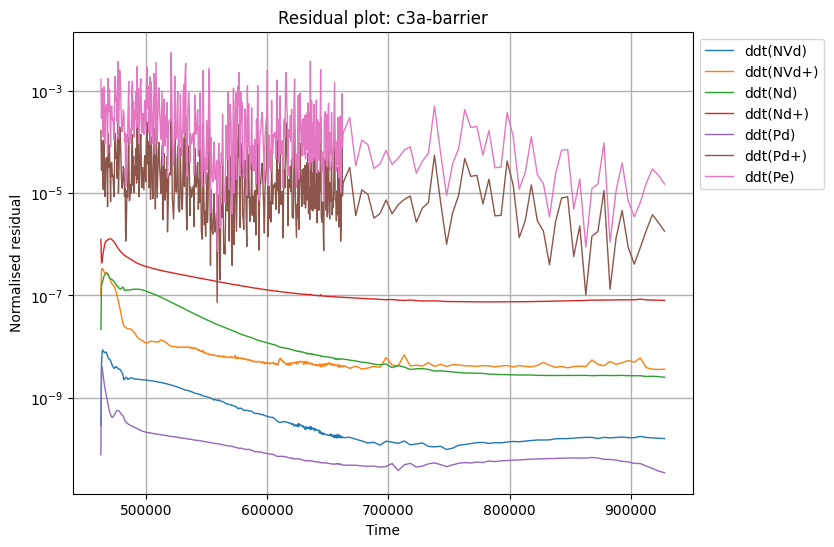

In [5]:
plot_ddt(caseng, smoothing = 1)

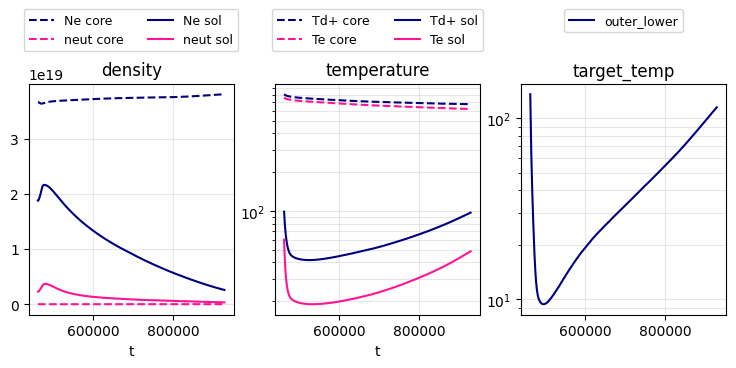

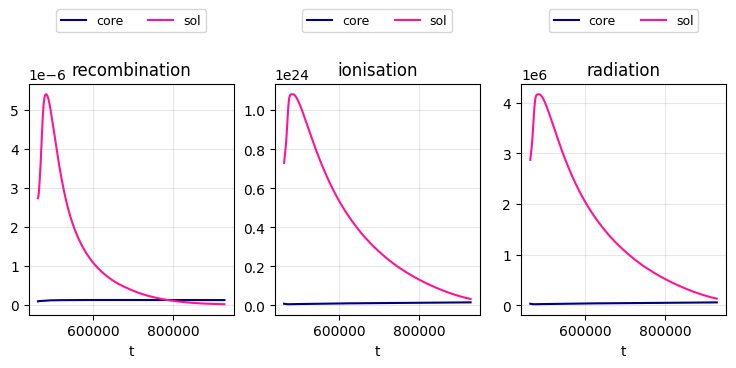

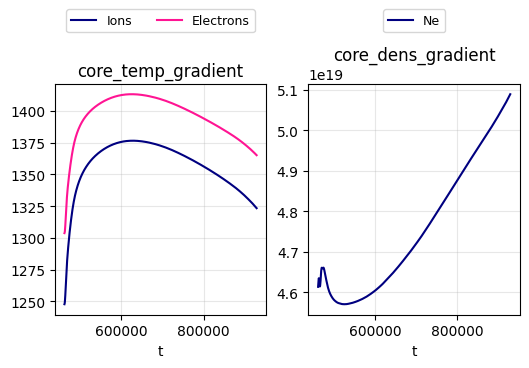

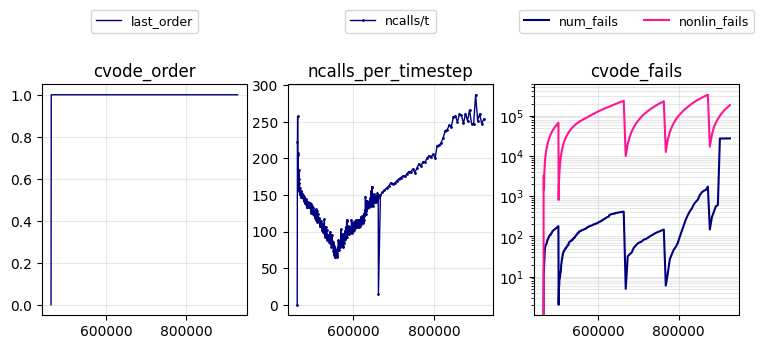

In [10]:
Monitor(case, [["density", "temperature","target_temp"],
               ["recombination", "ionisation", "radiation"],
               ["core_temp_gradient", "core_dens_gradient"],
               ["cvode_order", "ncalls_per_timestep", "cvode_fails"]])
# Monitor(case, [["recombination", "ionisation", "radiation"]])

Text(0, 0.5, 'Ncalls / time')

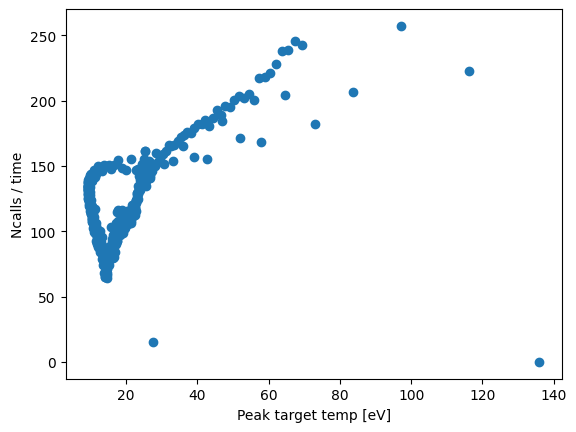

In [8]:
fig, ax = plt.subplots()

ax.scatter(target_temp[0:-1], ncalls_per_t)
ax.set_xlabel("Peak target temp [eV]")
ax.set_ylabel("Ncalls / time")

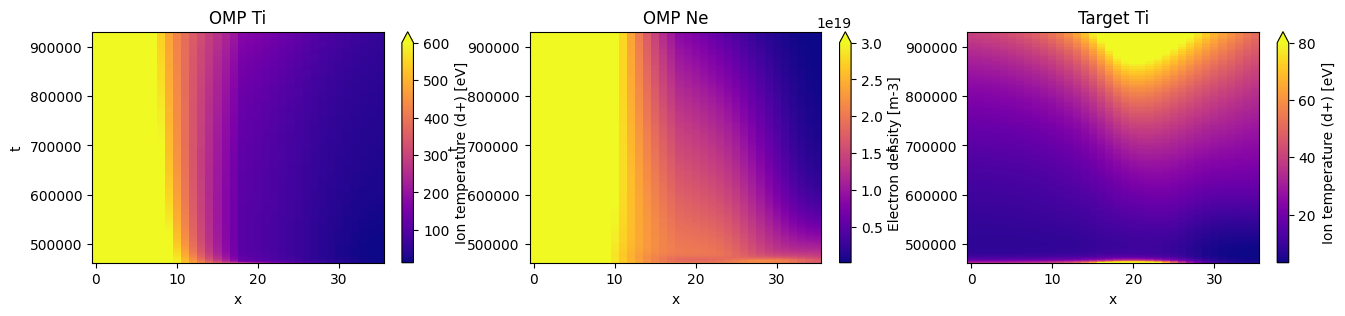

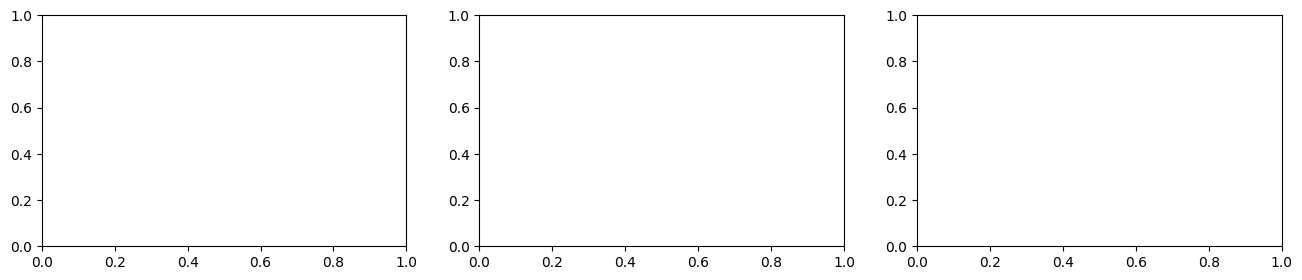

In [11]:
fig, axes = plt.subplots(1,3,figsize = (16,3))

caseng.select_region("outer_midplane_a")["Td+"].plot(ax = axes[0], vmax=600, cmap = "plasma")
axes[0].set_title("OMP Ti")

caseng.select_region("outer_midplane_a")["Ne"].plot(ax = axes[1], vmax=3e19, cmap = "plasma")
axes[1].set_title("OMP Ne")

caseng.select_region("outer_lower_target")["Td+"].plot(ax = axes[2], vmax=80, cmap = "plasma")
axes[2].set_title("Target Ti")

fig, axes = plt.subplots(1,3,figsize = (16,3))



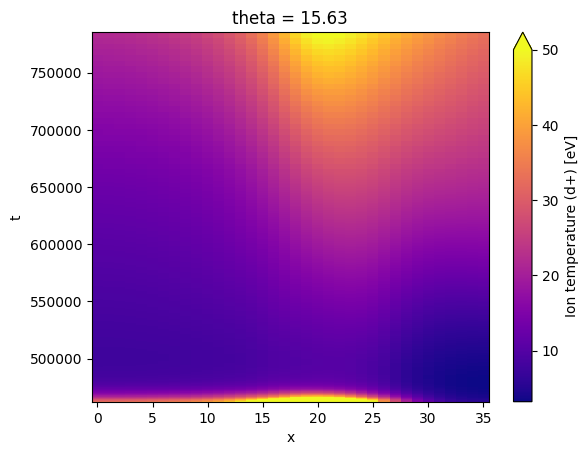

In [6]:
caseng.select_region("outer_lower_target")["Td+"].plot(vmax=50, cmap = "plasma")


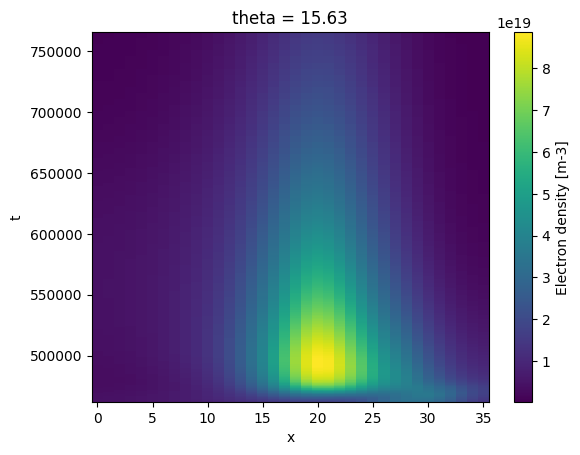

In [9]:
caseng.select_region("outer_lower_target")["Ne"].plot()

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


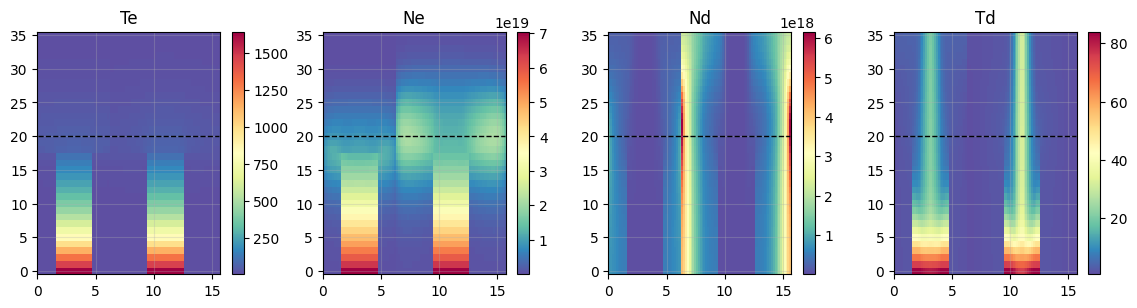

In [8]:
Monitor2D(caseng, "grid", [["Te", "Ne", "Nd", "Td"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


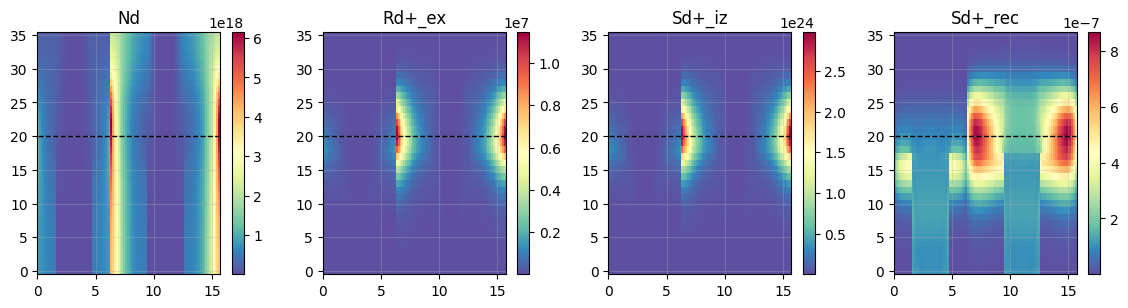

In [9]:
Monitor2D(caseng, "grid", [["Nd", "Rd+_ex", "Sd+_iz", "Sd+_rec"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


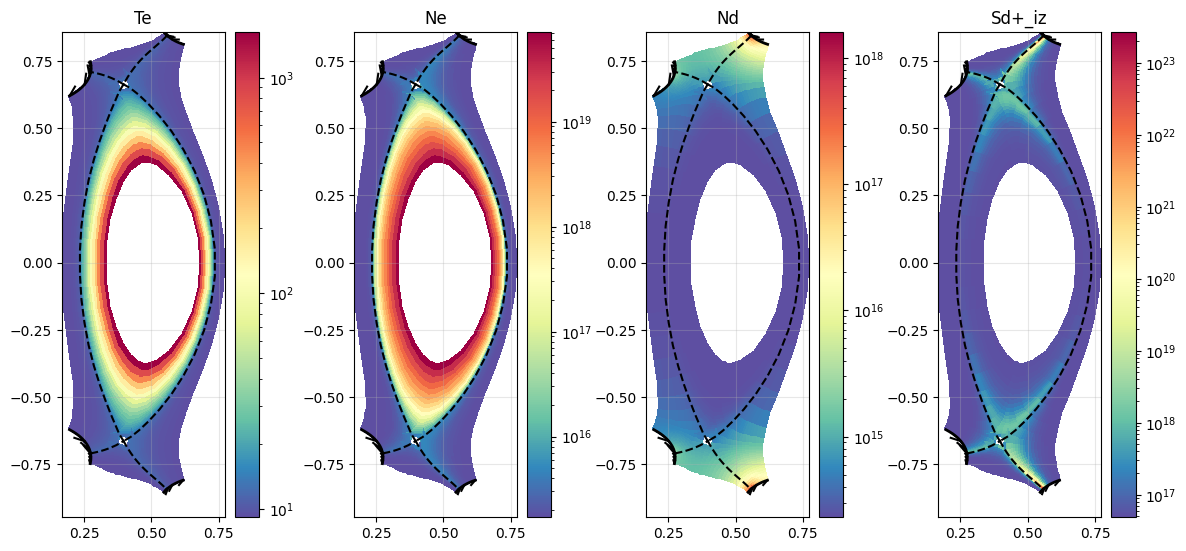

In [12]:
Monitor2D(caseng, "pcolor", [["Te", "Ne", "Nd", "Sd+_iz"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


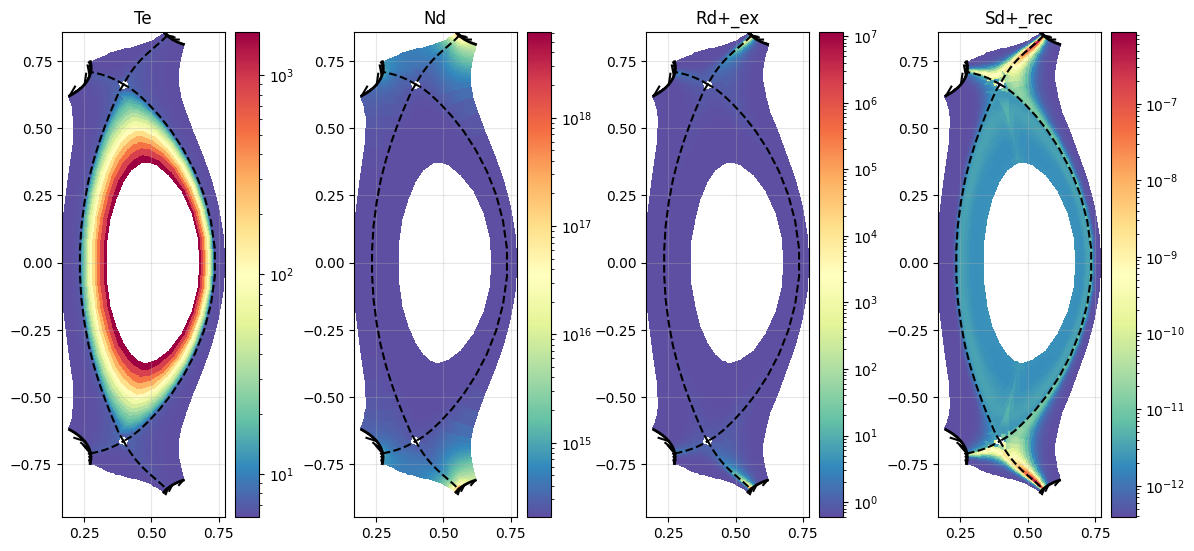

In [11]:
Monitor2D(caseng, "pcolor", [["Te", "Nd", "Rd+_ex", "Sd+_rec"]])

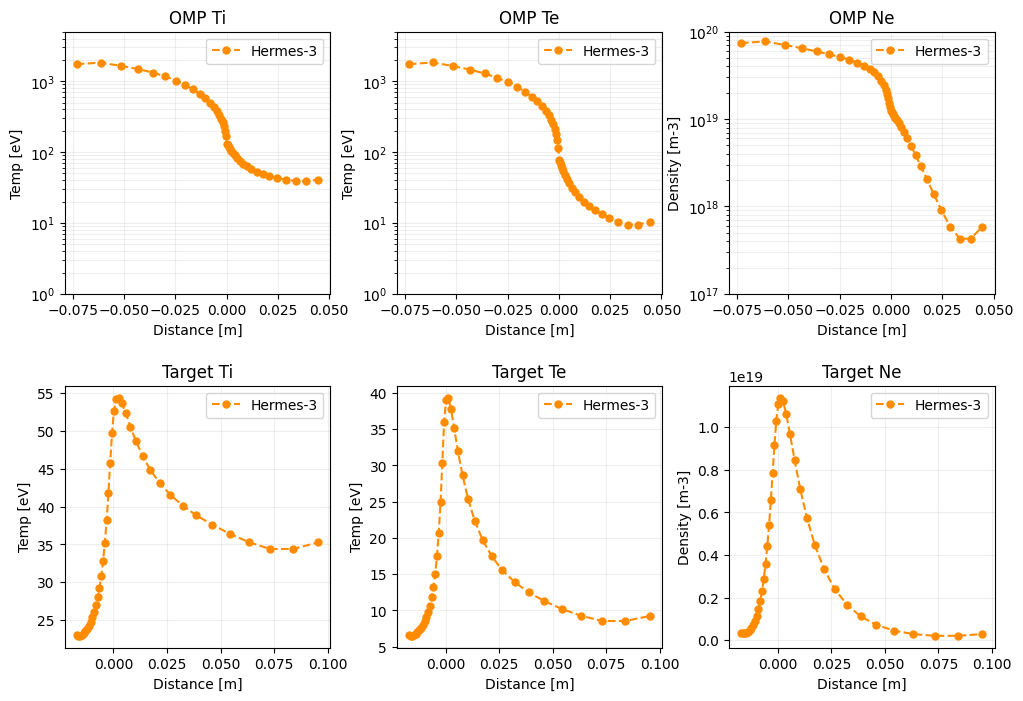

In [7]:
target = Target(case, "outer_lower")
omp = case.select_region("outer_midplane_a").isel(t=-1)

xsep = 0.736

offset_t = -0.018

cols=3; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["teal", "darkorange", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 5

ax = axes[0,0]; ax.set_title("OMP Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Td+"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,1]; ax.set_title("OMP Te"); ax.set_ylabel("Temp [eV]")
# param = "te3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Te"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,2]; ax.set_title("OMP Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Ne"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1e17, 1e20)

ax = axes[1,0]; ax.set_title("Target Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,1]; ax.set_title("Target Te"); ax.set_ylabel("Temp [eV]")
# param = "te3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.electron_temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,2]; ax.set_title("Target Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.density[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()
    

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


ValueError: 'linthresh' must be positive

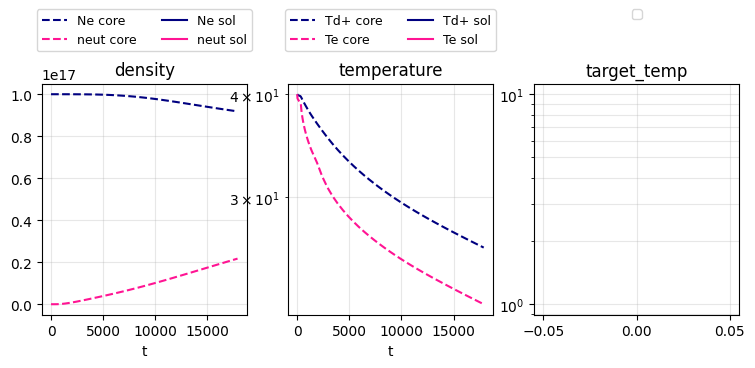

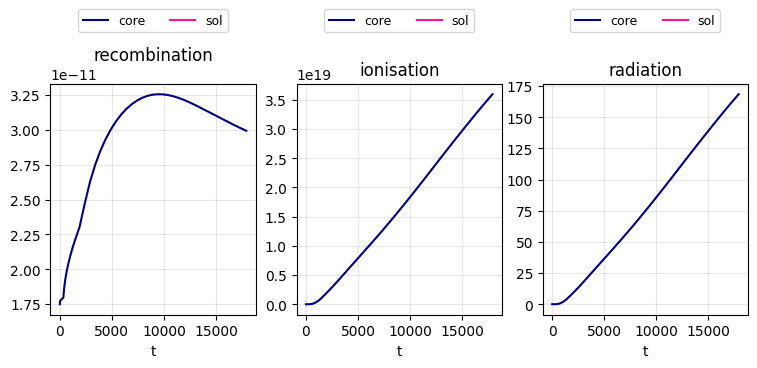

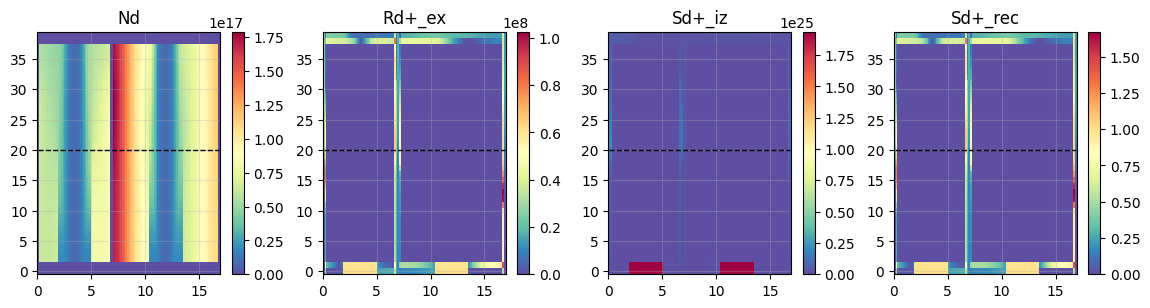

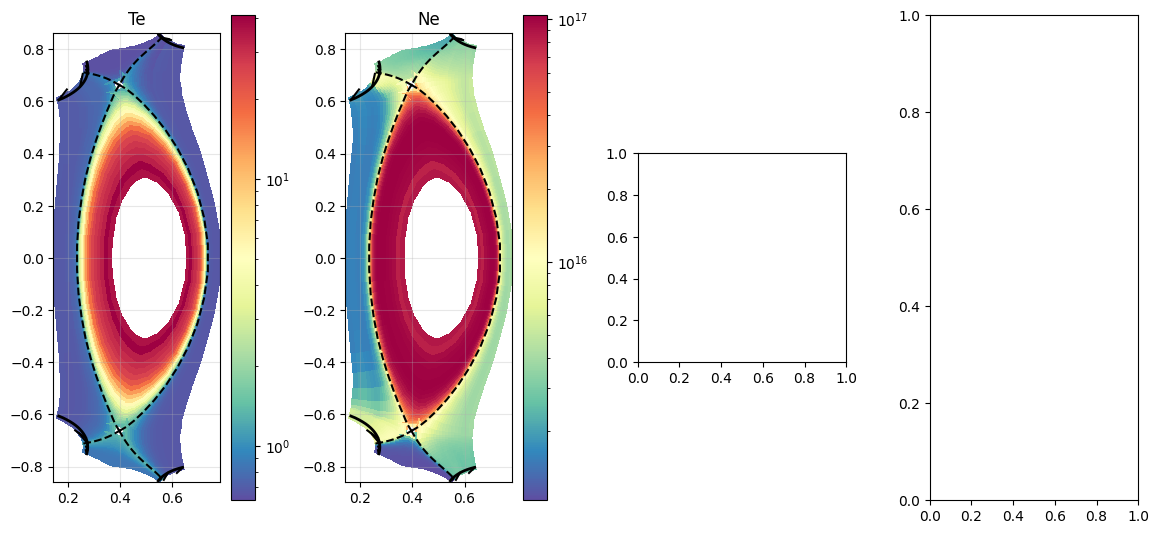

In [13]:
db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

for choice in ["b4b-40eV_1e17_fixndiff", "b5b-40eV_1e18_fixndiff"]:

    case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                        double_load = True)

    Monitor(caseng, [["density", "temperature","target_temp"]])
    Monitor(caseng, [["recombination", "ionisation", "radiation"]])
    Monitor2D(case, "grid", [["Nd", "Rd+_ex", "Sd+_iz", "Sd+_rec"]])
    Monitor2D(case, "pcolor", [["Te", "Ne", "Nd", "Sd+_iz"]])

In [ ]:
pkl_path = r"/users/mjk557/scratch/last10s.pkl"

def read_from_pickle(path):
    with open(path, 'rb') as file:
        try:
            while True:
                return pkl.load(file)
        except EOFError:
            pass
        
x = read_from_pickle(pkl_path)

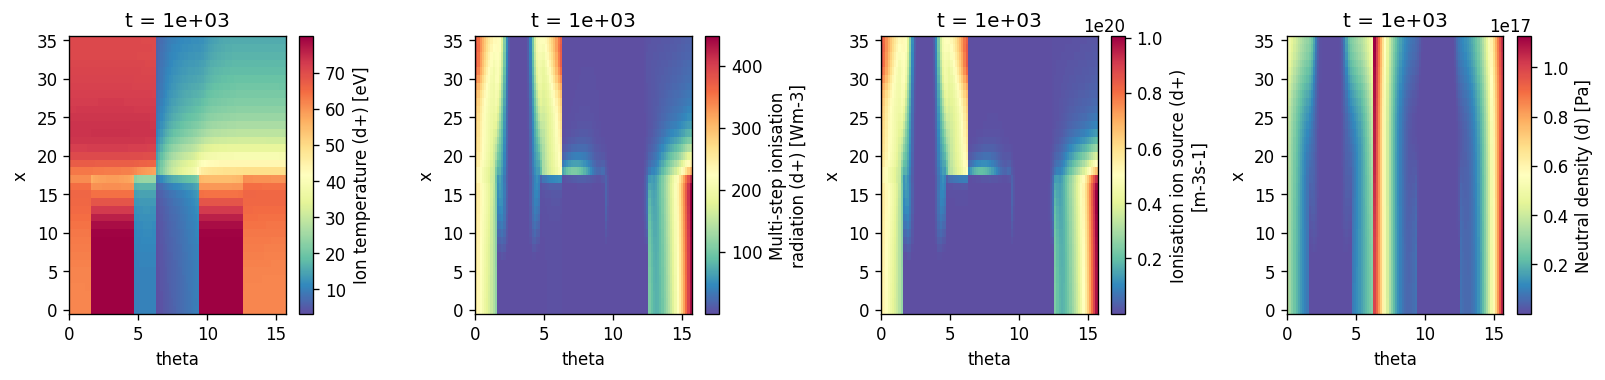

In [ ]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*4,3), dpi = 120)
fig.subplots_adjust(wspace = 0.5)
# fig.tight_layout(pad = 1)
time = self.ds["t"][-1]

data["Td+"].sel(t=time).plot(ax = axes[0], cmap = "Spectral_r",
# vmin = 53, vmax = 1600, 
)
(data["Rd+_ex"].sel(t=time)*-1).plot(ax = axes[1], cmap = "Spectral_r", 
)
data["Sd+_iz"].sel(t=time).plot(ax = axes[2], cmap = "Spectral_r",
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].sel(t=time).plot(ax = axes[3], cmap = "Spectral_r", 
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

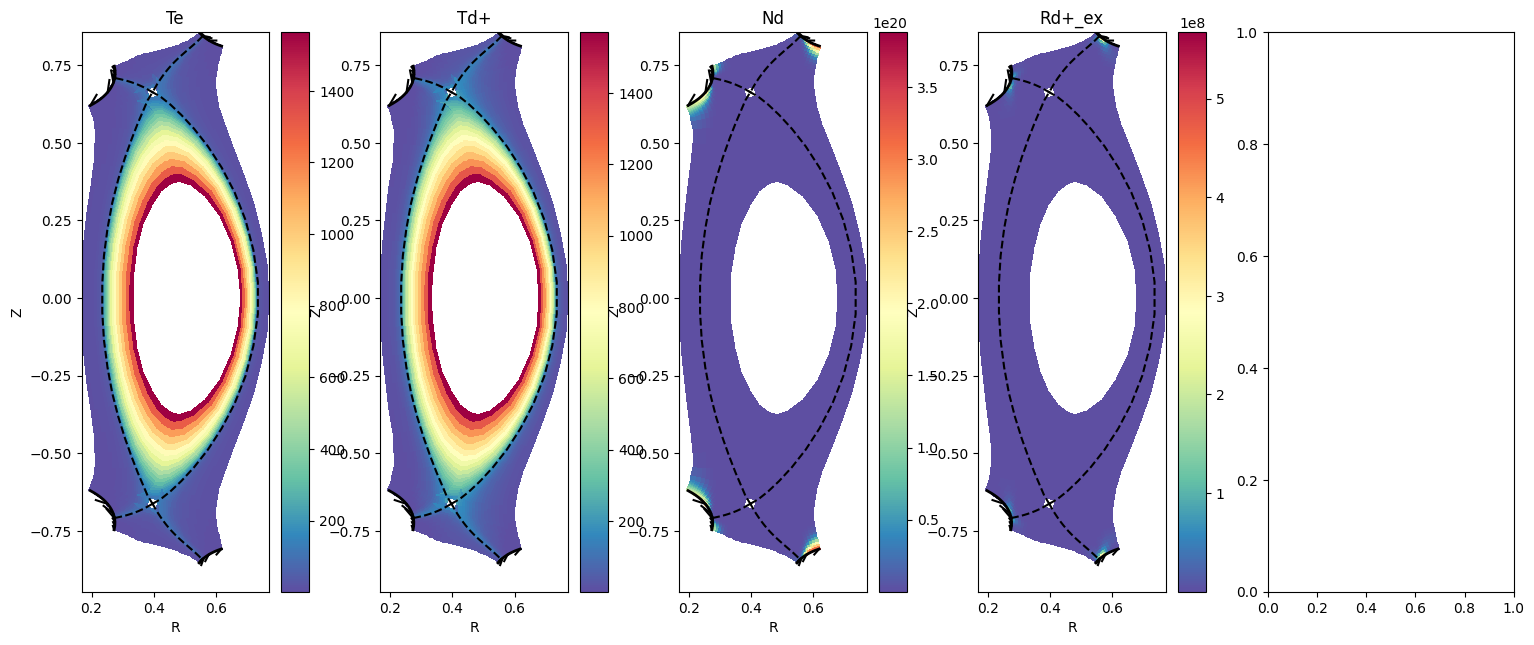

In [ ]:
data = caseng.ds

cols = 5
fig, axes = plt.subplots(1,cols, figsize = (cols*3,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = -1

data["Te"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False,
# vmin = 53, vmax = 1600, 
)

data["Td+"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False,
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False,
# vmin = 9.7e13, vmax = 2.9e19, 
)
(data["Rd+_ex"].isel(t=tind)*-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = False, 
)
# (data["Sd+_iz"].isel(t=tind)).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

In [ ]:
import grid_fields
meshwrapper = grid_fields.Mesh(r"/users/mjk557/scratch/cases/st40/b2b-allsource_newmaster_scratch/g3a3f3-allflux_proper.nc")

m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21


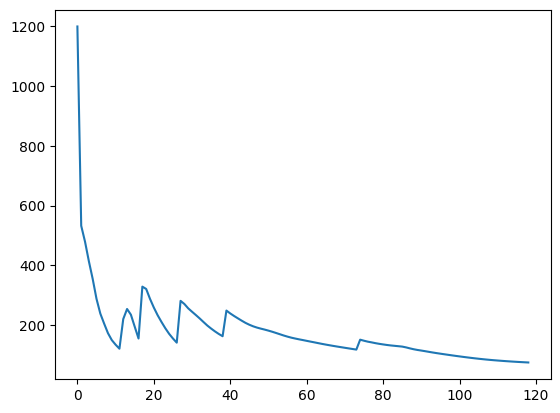

In [ ]:
plt.plot(target.peak_temperature)